In [1]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os
import csv
from expectation import get_expectation_afm_heisenberg, AFMHeisenbergArgs
from functools import partial

p = 3
length = 4
filepath_o = ".results/100iter"
filepath = "100iter"
figure = True
b = (0,1)
bounds = [b] * (2 * p)  # Create a list of bounds of length 2 * p

qsim_option = {'t': int(length / 2), 'f': 1}

initial_gamma = np.array([0.6 for i in range(p)])
initial_beta = np.array([0.6 for i in range(p)])
init_param = np.concatenate([initial_gamma, initial_beta])

def clear_and_recreate_directory(dir_path):
    try:
        if os.path.exists(dir_path):
            shutil.rmtree(dir_path)
            print(f"Directory {dir_path} cleared.")
        os.makedirs(dir_path)
        print(f"Directory {dir_path} created.")
    except Exception as e:
        print(f"Error occurred while trying to clear and recreate the directory: {e}")

function_args = AFMHeisenbergArgs(length, qsim_option)
function = partial(get_expectation_afm_heisenberg, function_args=function_args)

def energy_dummy(params):
    gamma, beta = np.split(params, 2)
    energy = function(gamma=gamma, beta=beta)
    return energy

# Define the gradient function
def numerical_gradient(func, params, epsilon=1e-2):
    grad = np.zeros_like(params)
    for i in range(len(params)):
        params_eps = np.array(params)
        params_eps[i] += epsilon
        grad[i] = (func(params_eps) - func(params)) / epsilon
    return grad

history_params = []
history_energy = []

def callback(params):
    history_params.append(params)
    history_energy.append(energy_dummy(params))
    gamma, beta = np.split(params, 2)
    record = [len(history_energy), energy_dummy(params)] + list(gamma) + list(beta)
    # Open the file in append mode and write the record
    with open(filepath, mode='a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(record)
        if figure:
            print(record)
        f.flush()

clear_and_recreate_directory(filepath_o)

with open(filepath, mode='w', newline='') as f:
        writer = csv.writer(f)
        headline = ["iter", "energy"]
        for p in range(int(len(initial_gamma))):
            headline.append("gamma[{}]".format(p))
            headline.append("beta[{}]".format(p))
        writer.writerow(headline)

result = minimize(energy_dummy, init_param, method="BFGS", jac=lambda params: numerical_gradient(energy_dummy, params), bounds=bounds, callback=callback)#L-BFGS-B

print(result)
print(history_params)
print(history_energy)

plt.plot(history_energy)
plt.xlabel("iterations")
plt.ylabel("energy")
plt.show()

Directory .results/100iter cleared.
Directory .results/100iter created.


IsADirectoryError: [Errno 21] Is a directory: '.results/100iter'

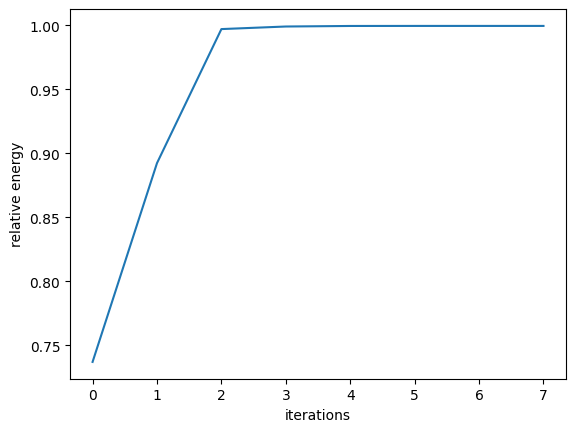

In [ ]:
from exact_expectation import get_exact_expectation_afm_heisenberg
exact_energy, state = get_exact_expectation_afm_heisenberg(length)

plt.plot(history_energy/exact_energy)
plt.xlabel("iterations")
plt.ylabel("relative energy")
plt.show()


In [ ]:
clear_directory(".results/100iter")

Directory .results/100iter cleared.
